In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

csv_path = r'D:\Projects\MSI2-ants\Results\Hypothesis4\final.csv'
df = pd.read_csv(csv_path, sep=',')

# TestId = {TestName}_{Solver}_{TestData}

# add columns from column df['TestId']
df['Solver'] = df['TestId'].apply(lambda x: x.split('_')[-3])
df['TestData'] = df['TestId'].apply(lambda x: x.split('_')[-1])
df

,TestId,Date,Time,Cost,OptimalCost,CostDifference,RoutesCount,OptimalRoutesCount,AverageRouteUtilization,Solver,TestData
0,Hypothesis4_2OptVsClassicWithDispersion_AntCol...,2025-04-06T22:41:37Z,5909,31663,27591,14,27,26,92.54,AntColony,X-n101-k25
1,Hypothesis4_2OptVsClassicWithDispersion_AntCol...,2025-04-06T22:41:37Z,6780,31305,27591,13,27,26,92.54,AntColony2Opt,X-n101-k25
2,Hypothesis4_2OptVsClassicWithDispersion_AntCol...,2025-04-06T22:41:37Z,5333,30650,27591,11,27,26,92.54,AntColony,X-n101-k25
3,Hypothesis4_2OptVsClassicWithDispersion_AntCol...,2025-04-06T22:41:37Z,6740,30750,27591,11,26,26,96.10,AntColony2Opt,X-n101-k25
4,Hypothesis4_2OptVsClassicWithDispersion_AntCol...,2025-04-06T22:41:37Z,5306,31202,27591,13,27,26,92.54,AntColony,X-n101-k25
5,Hypothesis4_2OptVsClassicWithDispersion_AntCol...,2025-04-06T22:41:37Z,6670,30882,27591,11,27,26,92.54,AntColony2Opt,X-n101-k25
6,Hypothesis4_2OptVsClassicWithDispersion_AntCol...,2025-04-06T22:51:13Z,5940,54598,27591,97,27,26,92.54,AntColony,X-n101-k25 copy
7,Hypothesis4_2OptVsClassicWithDispersion_AntCol...,2025-04-06T22:51:13Z,6853,53140,27591,92,27,26,92.54,AntColony2Opt,X-n101-k25 copy
8,Hypothesis4_2OptVsClassicWithDispersion_AntCol...,2025-04-06T22:51:13Z,5698,54030,27591,95,26,26,96.10,AntColony,X-n101-k25 copy
9,Hypothesis4_2OptVsClassicWithDispersion_AntCol...,2025-04-06T22:51:13Z,7561,53247,27591,92,26,26,96.10,AntColony2Opt,X-n101-k25 copy


In [7]:
# group by TestData column and calculate mean of Cost, OptimalCost, RoutesCount, OptimalRoutesCount, AverageRouteUtilization and create new df
df_grouped = df.groupby(['TestData', 'Solver']).agg(
    Cost=('Cost', 'mean'),
    OptimalCost=('OptimalCost', 'mean'),
    RoutesCount=('RoutesCount', 'mean'),
    OptimalRoutesCount=('OptimalRoutesCount', 'mean'),
    AverageRouteUtilization=('AverageRouteUtilization', 'mean'),
).reset_index()

# add column with względna różnica kosztu (Cost - OptimalCost) / OptimalCost
df_grouped['RelativeCostDifference'] = (df_grouped['Cost'] - df_grouped['OptimalCost']) / df_grouped['OptimalCost']
df_grouped['RelativeCostDifference'] = df_grouped['RelativeCostDifference'].apply(lambda x: round(x, 2))

# add column with względna różnica liczby tras (RoutesCount - OptimalRoutesCount) / OptimalRoutesCount
df_grouped['RelativeRoutesCountDifference'] = (df_grouped['RoutesCount'] - df_grouped['OptimalRoutesCount']) / df_grouped['OptimalRoutesCount']
df_grouped['RelativeRoutesCountDifference'] = df_grouped['RelativeRoutesCountDifference'].apply(lambda x: round(x, 2))

df_grouped

,TestData,Solver,Cost,OptimalCost,RoutesCount,OptimalRoutesCount,AverageRouteUtilization,RelativeCostDifference,RelativeRoutesCountDifference
0,X-n101-k25,AntColony,31171.666667,27591.0,27.000000,26.0,92.540000,0.13,0.04
1,X-n101-k25,AntColony2Opt,30979.000000,27591.0,26.666667,26.0,93.726667,0.12,0.03
2,X-n101-k25 copy,AntColony,54231.333333,27591.0,26.666667,26.0,93.726667,0.97,0.03
3,X-n101-k25 copy,AntColony2Opt,53164.666667,27591.0,26.333333,26.0,94.913333,0.93,0.01


Average distance of customers for X-n101-k25 from depot: 450,04
Average distance of customers for X-n106-k14 from depot: 868,152380952381
Average distance of customers for X-n110-k13 from depot: 380,79816513761466
Average distance of customers for X-n101-k25 copy from depot: 798,83


In [8]:
# Add column AverageDistanceOfCustomers to df_grouped
df_grouped['AverageDistanceOfCustomers'] = 0.0

# Update values using .loc
df_grouped.loc[df_grouped['TestData'] == 'X-n101-k25', 'AverageDistanceOfCustomers'] = 450.04
df_grouped.loc[df_grouped['TestData'] == 'X-n101-k25 copy', 'AverageDistanceOfCustomers'] = 798.83
df_grouped.loc[df_grouped['TestData'] == 'X-n101-k25 copy 2', 'AverageDistanceOfCustomers'] = 1151.96


# df_grouped.loc[df_grouped['TestData'] == 'X-n106-k14', 'AverageDistanceOfCustomers'] = 868.152380952381
# df_grouped.loc[df_grouped['TestData'] == 'X-n110-k13', 'AverageDistanceOfCustomers'] = 380.79816513761466

# reorder rows with X-n110-k13 to the beginning of the df_grouped
# df_grouped = df_grouped.sort_values(by=['TestData'], ascending=True)

df_grouped

,TestData,Solver,Cost,OptimalCost,RoutesCount,OptimalRoutesCount,AverageRouteUtilization,RelativeCostDifference,RelativeRoutesCountDifference,AverageDistanceOfCustomers
0,X-n101-k25,AntColony,31171.666667,27591.0,27.000000,26.0,92.540000,0.13,0.04,450.04
1,X-n101-k25,AntColony2Opt,30979.000000,27591.0,26.666667,26.0,93.726667,0.12,0.03,450.04
2,X-n101-k25 copy,AntColony,54231.333333,27591.0,26.666667,26.0,93.726667,0.97,0.03,798.83
3,X-n101-k25 copy,AntColony2Opt,53164.666667,27591.0,26.333333,26.0,94.913333,0.93,0.01,798.83


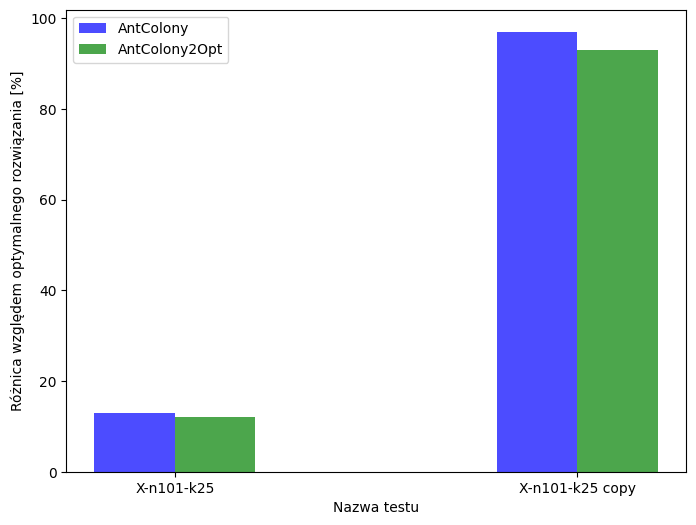

In [9]:
AntColony_relative_cost = df_grouped[df_grouped['Solver'] == 'AntColony']
AntColony_relative_cost = AntColony_relative_cost[['TestData', 'RelativeCostDifference']]
AntColony_relative_cost['RelativeCostDifference'] = AntColony_relative_cost['RelativeCostDifference'] * 100

AntColony2opt_relative_cost = df_grouped[df_grouped['Solver'] == 'AntColony2Opt']
AntColony2opt_relative_cost = AntColony2opt_relative_cost[['TestData', 'RelativeCostDifference']]
AntColony2opt_relative_cost['RelativeCostDifference'] = AntColony2opt_relative_cost['RelativeCostDifference'] * 100

# Define bar width
bar_width = 0.2

# Define positions for the bars
x = np.arange(len(AntColony_relative_cost['TestData']))

# Plot AntColony bars
plt.figure(figsize=(8, 6))
plt.bar(x - bar_width / 2, AntColony_relative_cost['RelativeCostDifference'], width=bar_width, color='blue', alpha=0.7, label='AntColony')

# Plot AntColony2Opt bars
plt.bar(x + bar_width / 2, AntColony2opt_relative_cost['RelativeCostDifference'], width=bar_width, color='green', alpha=0.7, label='AntColony2Opt')

# Add legend
plt.legend()

# Add title and labels
plt.xlabel('Nazwa testu')
plt.ylabel('Różnica względem optymalnego rozwiązania [%]')
# plt.title('Porównanie AntColony i AntColony2Opt względem optymalnego rozwiązania')
plt.xticks(x, AntColony_relative_cost['TestData'])

# Show plot
plt.show()

In [ ]:
# change row with TestData == X-n101-k25 copy to TestData = X-n101-k25-disperse


,TestData,AntColony,AntColony2Opt,CostDifference,RelativeCostDifference
0,X-n101-k25,31171.666667,30979.000000,19267.0,0.618093
1,X-n101-k25 copy,54231.333333,53164.666667,106667.0,1.966889


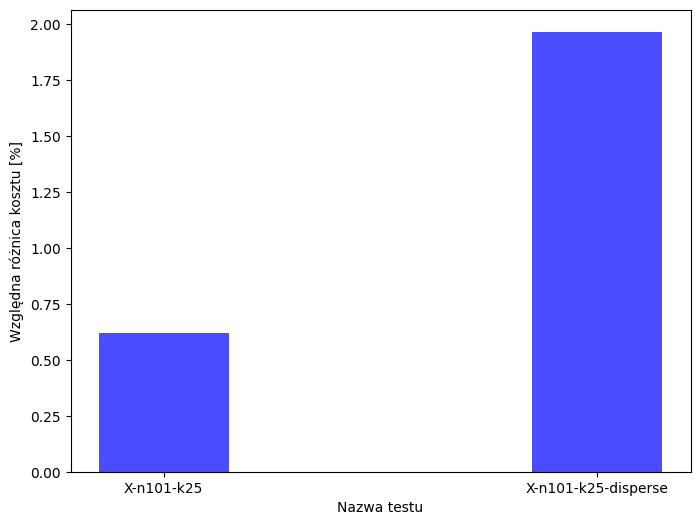

In [20]:
# compare AntColony and AntColony2Opt for each test data (get relative cost difference for each test data)

# get columns TestData, Solver, Cost
df2 = df_grouped[['TestData', 'Solver', 'Cost']]
df2

# calculate relative cost difference for each test data

df_final = pd.DataFrame(columns=['TestData', 'AntColony', 'AntColony2Opt'])
df_final['TestData'] = df2['TestData'].unique()
df_final['AntColony'] = df2[df2['Solver'] == 'AntColony']['Cost'].values
df_final['AntColony2Opt'] = df2[df2['Solver'] == 'AntColony2Opt']['Cost'].values

df_final['CostDifference'] = df_final['AntColony'] - df_final['AntColony2Opt']
df_final['CostDifference'] = df_final['CostDifference'].apply(lambda x: round(x, 2) * 100)
df_final['RelativeCostDifference'] = df_final['CostDifference'] / df_final['AntColony']
df_final.loc[df_final['TestData'] == 'X-n101-k25 copy', 'TestData'] = 'X-n101-k25-disperse'


# plot to histogram
plt.figure(figsize=(8, 6))
plt.bar(df_final['TestData'], df_final['RelativeCostDifference'], color='blue', alpha=0.7, width=0.3)
plt.xlabel('Nazwa testu')
plt.ylabel('Względna różnica kosztu [%]')
# plt.title('O ile procent AntColony2Opt jest lepszy od AntColony?')
plt.show()


In [19]:
df_final.loc[df_final['TestData'] == 'X-n101-k25 copy', 'TestData'] = 'X-n101-k25-disperse'
df_final

,TestData,AntColony,AntColony2Opt,CostDifference,RelativeCostDifference
0,X-n101-k25,31171.666667,30979.000000,19267.0,0.618093
1,X-n101-k25-disperse,54231.333333,53164.666667,106667.0,1.966889
